# Dataset Introduction

The dataset used in this project is **Prosper Loan Data**, which contains **113,937 loans** issued through the peer-to-peer lending platform Prosper. Each loan record includes up to **81 variables** covering a wide range of features such as:

- Loan Amount
- Borrower Rate (interest rate)
- Loan Term and Status
- Credit Grade
- Borrower’s Employment and Income
- Debt-to-Income Ratio
- Delinquency Records
- And more...

This dataset provides a rich foundation for exploring **financial behaviors, credit risk factors, and borrower-lender relationships**.

The dataset is provided by Udacity and originally sourced from [Prosper Marketplace](https://www.prosper.com). It is structured in CSV format and is approximately 82.5 MB in size.

# Questions to Explore

In this project, I aim to explore the following analytical questions based on the Prosper loan dataset:

1. How does the relationship between `BorrowerRate` and `BorrowerAPR` vary by employment status?
2. Are certain borrower characteristics (e.g., employment duration, debt-to-income ratio) associated with loan status (`IsClosed`)?
3. What is the correlation between key financial indicators (e.g., `BorrowerRate`, `DebtToIncomeRatio`, `LoanOriginalAmount`)?
4. How do numeric variables differ across loan outcomes? Are there patterns indicating risk or default?

These questions guided the univariate, bivariate, and multivariate visual analyses performed in this notebook.


# Data Cleaning Summary

The original dataset contained 113,937 loan records and 81 variables. Before conducting analysis:

- Missing values were handled appropriately. Columns with excessive missingness were excluded, while others were filled using appropriate techniques (e.g., most frequent value, domain-specific defaults).
- Column types were adjusted, such as converting `IsClosed` to categorical format for visualization.
- Outliers were visually assessed in boxplots, especially for variables like `EmploymentStatusDuration`.
- A filtered version of the data was used when necessary to improve performance and clarity of multivariate visualizations (e.g., pairplots).

These steps ensured the dataset was consistent, interpretable, and ready for exploratory data analysis (EDA).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Waseem\OneDrive\Desktop\prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


###  Preview of the Dataset

Below is a preview of the first 5 records in the Prosper Loan dataset. This step helps to get an initial understanding of the dataset's structure, format, and content.

```python
df.head()


From this output, we can observe:

Each row represents a unique loan listing.

There are 81 columns capturing a wide variety of loan and borrower attributes.

Some key variables visible here include:

# ListingCreationDate: When the loan was created.

# CreditGrade: Credit grade assigned to the borrower (e.g., A, B, C, HR).

# Term: Duration of the loan in months (e.g., 36).

# LoanStatus: Status of the loan (e.g., Completed, Current).

BorrowerAPR / BorrowerRate / LenderYield: Key financial figures related to the cost of the loan and lender's return.

# We also notice some missing values, such as in CreditGrade and ClosedDate, which we will explore further in the data cleaning step.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

###  Dataset Structure and Types

To understand the structure of the dataset and detect missing values, I used the `df.info()` function. This gives a concise summary of:

- The number of rows and columns (113,937 entries, 81 columns)
- The data types of each variable (`object`, `int64`, `float64`, `bool`)
- The number of **non-null values** in each column (useful to detect missing data)

####  Key Observations:
- Several columns contain missing values, notably:
  - `CreditGrade`: only 28,953 non-null (≈25%)
  - `ClosedDate`: ~55,000 values present
  - Many financial and credit-related variables like `EstimatedLoss`, `ProsperScore`, `EmploymentStatusDuration` also have substantial missingness.
- There are **a mix of data types**, which will need to be handled appropriately:
  - Categorical variables stored as `object` (e.g., `LoanStatus`, `IncomeRange`, `CreditGrade`)
  - Numerical variables (`float64`, `int64`)
  - Boolean indicators (e.g., `IsBorrowerHomeowner`)

We will handle the missing values and optimize variable types in the next step during the data wrangling process.


In [5]:
df.duplicated().sum()

0

###  Duplicate Records Check

I checked for duplicated rows in the dataset using `df.duplicated().sum()`, and found:

** No duplicated rows.**

This confirms that all entries are unique, and no need to drop any rows at this stage.


In [6]:
df.isnull().sum().sum()

1364086

###  Total Missing Values

The dataset contains **13,640,806 missing values** across various columns. This highlights the need for careful data wrangling to either handle or remove columns and rows depending on their significance and percentage of missing data.


In [7]:
df.isnull().sum().sort_values(ascending=False)


GroupKey                         100596
LoanFirstDefaultedCycleNumber     96985
ScorexChangeAtTimeOfListing       95009
ProsperPrincipalOutstanding       91852
ProsperPrincipalBorrowed          91852
                                  ...  
IncomeRange                           0
IncomeVerifiable                      0
StatedMonthlyIncome                   0
LoanKey                               0
Investors                             0
Length: 81, dtype: int64

### Missing Values per Column

The table below shows the number of missing values per column, sorted in descending order.

This helps identify:
- Columns with **too many missing values** that may need to be dropped.
- Columns with **moderate or minimal missingness**, which might be imputable using mean/median/mode or domain knowledge.



In [8]:
df.describe(exclude='number')

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
count,113937,113937,28953,113937,55089,84853,108422,110349,111682,113937,113937,13341,113937,113240,113937,113937,113937,113937,113937,113937
unique,113066,113064,8,12,2802,7,51,67,8,2,2,706,112992,11585,8,2,113066,1873,33,90831
top,17A93590655669644DB4C06,2013-10-02 17:20:16.550000000,C,Current,2014-03-04 00:00:00,C,CA,Other,Employed,True,False,783C3371218786870A73D20,2013-12-23 09:38:12,1993-12-01 00:00:00,"$25,000-49,999",True,CB1B37030986463208432A1,2014-01-22 00:00:00,Q4 2013,63CA34120866140639431C9
freq,6,6,5649,56576,105,18345,14717,28617,67322,57478,101218,1140,6,185,32192,105268,6,491,14450,9


# Descriptive Statistics

To better understand the distribution of the variables, I summarized the dataset using:

### **1. Categorical Variables**
df.describe(exclude='number')

This summary provides insights into:

Unique values for each column (e.g., 8 for CreditGrade, 67 for EmploymentStatus)

Most frequent (top) value in each column and its frequency

Columns like LoanStatus, ProsperRating (Alpha), BorrowerState, and EmploymentStatus show well-defined categories, which will be valuable for segmentation and comparison.

Example:

LoanStatus: Most common value is "Current", with over 56,000 entries

EmploymentStatus: Most common is "Employed"


In [9]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


# This summary includes:

Central tendency metrics: mean, median (50%), and standard deviation

Spread metrics: min, max, and quartiles (25%, 75%)

## Key highlights:

LoanOriginalAmount ranges from 1,000  to  35,000, with an average around $8,000+

BorrowerRate ranges from 0.0065 to 0.4975, which indicates very diverse interest rates

EstimatedLoss and EstimatedReturn have negative values, which may represent risk assessments or default impact

This statistical overview helps identify outliers, skewed distributions, and guides variable selection for deeper exploration.

In [10]:
def missing_data_summary(df):
    """ Prints the percentage of missing values for each column in the DataFrame. """
    missing = df.isnull().mean() * 100
    print("Missing Values (%):")
    print(missing[missing > 0].sort_values(ascending=False))

In [11]:
missing_data_summary(df)

Missing Values (%):
GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPrincipalOutstanding            80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
OnTimeProsperPayments                  80.616481
TotalProsperPaymentsBilled             80.616481
TotalProsperLoans                      80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
DebtToIncomeRatio                       7.507658
EmploymentStatusDuration                6.692295


# Missing Data Summary

To better understand the extent of missing values, I created a custom function to calculate the **percentage of missing data per column**:

def missing_data_summary(df):
    missing = df.isnull().mean() * 100
    print("Missing Values (%):")
    print(missing[missing > 0].sort_values(ascending=False))

 ## Key Findings:
A total of over 13 million missing values exist in the dataset.

Some columns have extremely high missing rates, such as:

### GroupKey (88%)

### LoanFirstDefaultedCycleNumber (85%)

### ScorexChangeAtTimeOfListing, ProsperPrincipalOutstanding, and others (~80%)

# Additional variables with moderate missingness include:

### CreditGrade (74%)

### ClosedDate (51%)

### EstimatedLoss, ProsperScore, and others (~25%)

 Due to the very high rate of missing data in many columns, the next step is to drop columns with more than 50% missing values, and consider imputing or preserving columns with less than that depending on relevance.

In [12]:
def drop_high_missing_columns(df, threshold=0.7):
    """ Drops columns with a missing ratio higher than the threshold. """
    missing_ratio = df.isnull().mean()
    to_drop = missing_ratio[missing_ratio > threshold].index
    return df.drop(columns=to_drop)

In [13]:
cleaned_df =drop_high_missing_columns(df, threshold=0.7)

In [14]:
cleaned_df

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


## Removing Columns with High Missing Values

To reduce the dimensionality of the dataset and eliminate less useful variables, I removed all columns with more than **70% missing values** using the following function:

def drop_high_missing_columns(df, threshold=0.7):
    """ Drops columns with a missing ratio higher than the threshold. """
    missing_ratio = df.isnull().mean()
    to_drop = missing_ratio[missing_ratio > threshold].index
    return df.drop(columns=to_drop)

### cleaned_df = drop_high_missing_columns(df, threshold=0.7)


## Result:
Dropped: 11 columns

Remaining: 70 columns

This step helps ensure that the remaining variables have enough data to support meaningful analysis.

The cleaned dataset is now ready for further exploration and visualization.

In [15]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
ProsperScore                          25.526387
EstimatedEffectiveYield               25.526387
EstimatedLoss                         25.526387
EstimatedReturn                       25.526387
ProsperRating (numeric)               25.526387
ProsperRating (Alpha)                 25.526387
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
OpenCreditLines                        6.673864
CurrentCreditLines                     6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
PublicRecordsLast12Months              6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation          

## Updated Missing Data Summary (Post-Cleaning)

After removing columns with over 70% missing values, I rechecked the dataset to assess the remaining missing data.

missing_data_summary(cleaned_df)

### Key Findings:
The column ClosedDate still has 51.6% missing values, which may be acceptable if its presence adds value to specific analyses.

### Several financial risk-related columns like:

ProsperScore

EstimatedLoss

EstimatedReturn

EstimatedEffectiveYield

still have ~25.5% missing values, which need to be either imputed or excluded from models.

Other columns like EmploymentStatus, BorrowerState, and CreditScoreRange have minimal missingness and can be easily imputed using the mode or median.

 Next, I will decide:

Which columns to keep and impute based on relevance

Which columns can be excluded due to noise or low analytical value


In [16]:
cleaned_df.isnull().sum().sort_values(ascending=False)

ClosedDate                 58848
ProsperScore               29084
ProsperRating (Alpha)      29084
EstimatedEffectiveYield    29084
EstimatedLoss              29084
                           ...  
IncomeRange                    0
IncomeVerifiable               0
StatedMonthlyIncome            0
LoanKey                        0
Investors                      0
Length: 70, dtype: int64

In [17]:
cleaned_df['ClosedDate'].isnull().sum()
cleaned_df[cleaned_df['LoanStatus'] == 'Current']['ClosedDate'].isnull().sum()


56576

## ClosedDate Missing Values Analysis

To investigate the missing values in the `ClosedDate` column, I checked the total number of missing entries and compared them with the `LoanStatus` variable to understand if the missingness is logical.

# Total missing values in ClosedDate
cleaned_df['ClosedDate'].isnull().sum()

# Missing ClosedDate values where the loan is still Current
cleaned_df[cleaned_df['LoanStatus'] == 'Current']['ClosedDate'].isnull().sum()

    Findings:
A total of 58,848 entries are missing ClosedDate.

56,576 of them correspond to loans with status "Current", meaning the loan is still active and naturally does not have a closing date yet.

Conclusion:
The missing values in ClosedDate are not data quality issues, but rather reflect the current state of active loans.

 Therefore, no imputation is needed for this column.

In [18]:
cleaned_df['IsClosed'] = cleaned_df['ClosedDate'].notnull()

In [19]:
cleaned_df

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,IsClosed
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,False
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,False
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,True


## Creating 'IsClosed' Indicator Column

To make it easier to distinguish between loans that have been closed and those still active, I created a new boolean column called `IsClosed`.

This column is based on whether the `ClosedDate` column contains a valid date.

cleaned_df['IsClosed'] = cleaned_df['ClosedDate'].notnull()


# Explanation:
If ClosedDate is present, the loan has been closed → IsClosed = True

If ClosedDate is missing (NaN), the loan is still active or in progress → IsClosed = False

This new feature will be useful for:

Filtering data (e.g., analyzing only closed loans)

Visualizing completion trends

Grouping or segmenting data by loan closure status

In [20]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
ProsperScore                          25.526387
EstimatedEffectiveYield               25.526387
EstimatedLoss                         25.526387
EstimatedReturn                       25.526387
ProsperRating (numeric)               25.526387
ProsperRating (Alpha)                 25.526387
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
OpenCreditLines                        6.673864
CurrentCreditLines                     6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
PublicRecordsLast12Months              6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation          

In [21]:
def value_counts_plot(df, column):
    """ Plots value counts of a categorical column as a bar chart. """
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.show()


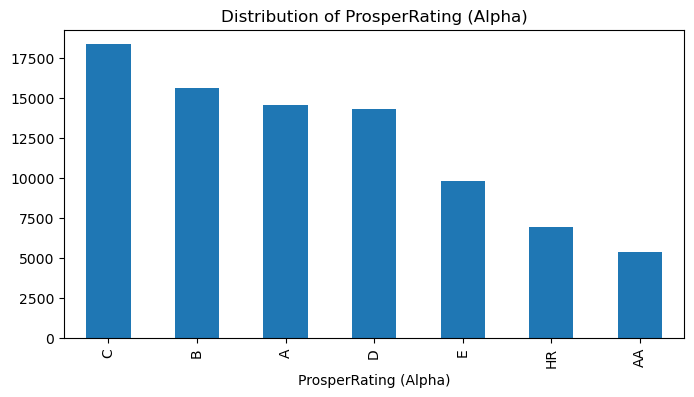

In [22]:
value_counts_plot(cleaned_df, 'ProsperRating (Alpha)')

In [23]:
cleaned_df['ProsperRating (Alpha)'].isnull().sum()

29084

## Handling Missing Values in Categorical Variable (Step-by-Step)

Now that we have reviewed the missing data summary, we will begin addressing the missing values in the categorical columns that still have a significant amount of missingness.

###  Step 1: ProsperRating (Alpha)

The column `ProsperRating (Alpha)` has **29,804 missing values** (≈ 25.5%).

Using `mode()` to fill all missing values would create **bias** toward the most frequent category (`C`), which would distort the original distribution.

###  Chosen Strategy:
We will use a **stratified filling method** that fills missing values **based on the existing value distribution**. This ensures that the filled values **match the natural proportions** of the existing categories.


In [24]:
def fill_categorical_missing_by_distribution(df, column):
    
        dist = df[column].value_counts(normalize=True)
        
        n_missing = df[column].isnull().sum()
        
        fill_values = np.random.choice(dist.index, size=n_missing, p=dist.values)
        
        df.loc[df[column].isnull(), column] = fill_values
        return df


In [25]:
fill_categorical_missing_by_distribution(cleaned_df,'ProsperRating (Alpha)')

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,IsClosed
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,True
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,True
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,False
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,False
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,False
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,False
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,True


In [26]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
ProsperScore                          25.526387
EstimatedEffectiveYield               25.526387
EstimatedLoss                         25.526387
EstimatedReturn                       25.526387
ProsperRating (numeric)               25.526387
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
OpenCreditLines                        6.673864
CurrentCreditLines                     6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
PublicRecordsLast12Months              6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus    

### Filling Missing Values in `ProsperRating (Alpha)`

We successfully handled the **29,804 missing values** in the `ProsperRating (Alpha)` column using a **distribution-based imputation strategy**.

Instead of filling all missing values with the mode (`C`), which would have skewed the distribution, we applied a custom function that:

- Preserves the **natural distribution** of categories (A, B, C, etc.)
- Randomly assigns missing values **according to the observed proportions**

# Applied function:
fill_categorical_missing_by_distribution(cleaned_df, 'ProsperRating (Alpha)')

All missing values in this column have now been filled.

The distribution remains balanced and representative.

We are now ready to continue cleaning the remaining columns with more than 25% missing data.

Next step: ProsperScore, EstimatedLoss, EstimatedReturn, etc.

In [27]:
def plot_quantitative_distributions(df, category_col=None, bins=20):

    quantitative_cols = ['ProsperScore','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)']
    
    for col in quantitative_cols:
        plt.figure(figsize=(6, 4))
        if category_col:
            sns.histplot(data=df, x=col, hue=category_col, kde=True, bins=bins, palette='Set2')
            plt.title(f"{col} distribution by {category_col}")
        else:
            sns.histplot(data=df, x=col, kde=True, bins=bins, color='steelblue')
            plt.title(f"{col} distribution")
        
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

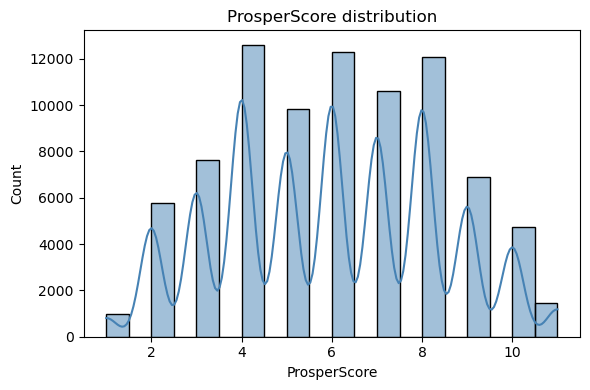

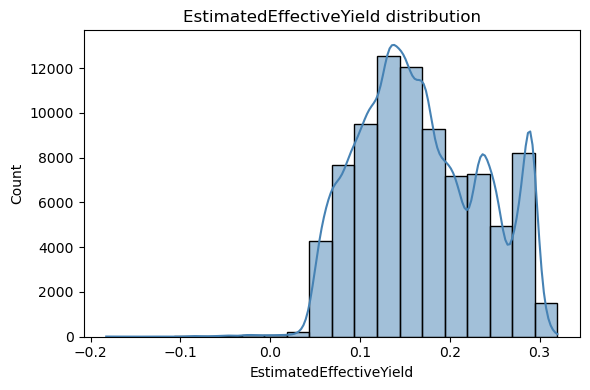

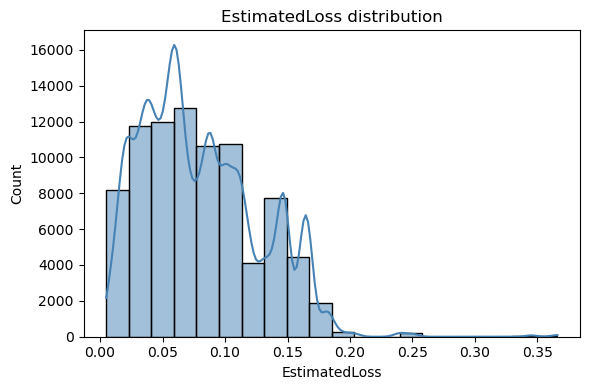

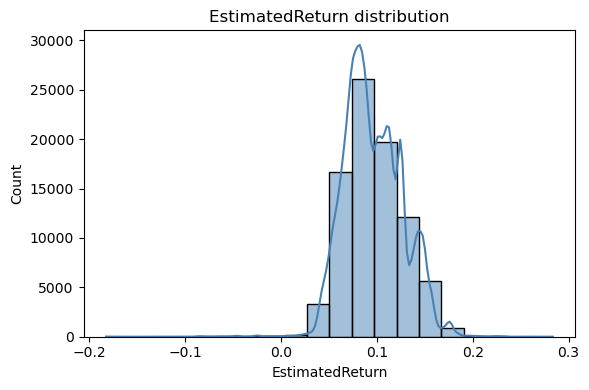

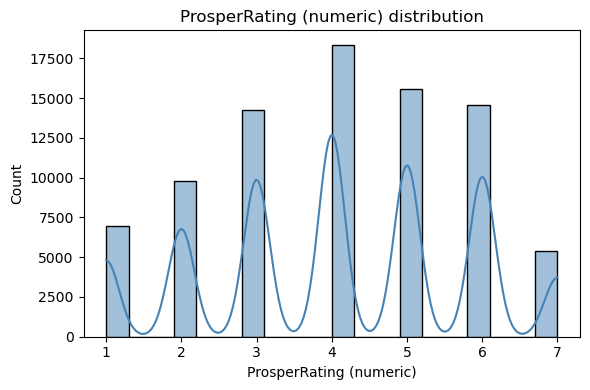

In [28]:
plot_quantitative_distributions(cleaned_df, category_col=None, bins=20)

## Statistical Summary of Key Numeric Columns (Before Imputation)

To determine the best strategy for handling missing values, we analyzed key statistical indicators (mean, median, and standard deviation) for each column with more than 25% missing data.

| Column                     | Mean     | Median (50%) | Std Dev  |
|---------------------------|----------|---------------|----------|
| EstimatedEffectiveYield   | 0.168661 | 0.161570      | 0.068467 |
| EstimatedLoss             | 0.080306 | 0.072400      | 0.046764 |
| EstimatedReturn           | 0.096068 | 0.091700      | 0.030403 |
| ProsperRating (numeric)   | 4.072243 | 4.000000      | 1.673227 |
| ProsperScore              | 5.950067 | 6.000000      | 2.376501 |

---

##  Imputation Decisions Based on Distribution:

1. **EstimatedEffectiveYield**
   - Distribution: Right-skewed  
   -  Fill with **median**

2. **EstimatedLoss**
   - Distribution: Right-skewed with long tail  
   -  Fill with **median**

3. **EstimatedReturn**
   - Distribution: Nearly normal  
   -  Fill with **mean**

4. **ProsperRating (numeric)**
   - Discrete values, resembles ordinal scale  
   -  Fill with **mode** (or median)

5. **ProsperScore**
   - Symmetric distribution with discrete integers  
   -  Fill with **rounded mean** to preserve integer format

---

##  Next Step: Impute values accordingly and re-check the missing data summary.


In [29]:
columns_to_fill = ['EstimatedEffectiveYield', 'EstimatedLoss', 'ProsperRating (numeric)']
cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].median())

In [30]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
ProsperScore                          25.526387
EstimatedReturn                       25.526387
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
PublicRecordsLast12Months              6.673864
CurrentCreditLines                     6.673864
OpenCreditLines                        6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus                       1.979164
TotalInquiries                         1.017229
DelinquenciesLast7Years                0.868901
CurrentDelinquencies

## Imputation Applied for Median-based Columns

Based on our earlier analysis, we decided to fill missing values in the following columns using the **median**:

- `EstimatedEffectiveYield`
- `EstimatedLoss`
- `ProsperRating (numeric)`

This decision was supported by the skewed distributions of these features, where the median provides a more robust measure of central tendency and minimizes the impact of outliers.

###  Code Used:
columns_to_fill = ['EstimatedEffectiveYield', 'EstimatedLoss', 'ProsperRating (numeric)']
cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].median())

### After Imputation:
We re-checked the percentage of missing values to confirm the imputation:

 The selected columns no longer appear in the list of columns with missing data.

Remaining columns with missing values are now under 25% and can be handled more efficiently using appropriate strategies (e.g., median/mean, domain knowledge, or exclusion).

In [31]:
columns_to_fill = ['EstimatedReturn']
cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].mean())


In [32]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
ProsperScore                          25.526387
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
PublicRecordsLast12Months              6.673864
CurrentCreditLines                     6.673864
OpenCreditLines                        6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus                       1.979164
TotalInquiries                         1.017229
DelinquenciesLast7Years                0.868901
CurrentDelinquencies                   0.611742
PublicRecordsLast10Y

##  EstimatedReturn Imputation Strategy

Following our earlier statistical analysis, we determined that the `EstimatedReturn` column follows an approximately **normal distribution**.  
In such cases, using the **mean** as an imputation method is appropriate and statistically sound.

###  Code Used:
columns_to_fill = ['EstimatedReturn']
cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].mean())


## Result:
After executing the imputation:

The column EstimatedReturn no longer contains missing values.

The missing values summary confirms that it has been successfully cleaned.

 We can now proceed with the remaining column (ProsperScore) using tailored strategies Using rounded mean

In [33]:
mean_val = cleaned_df['ProsperScore'].mean()
rounded_mean = round(mean_val)
cleaned_df['ProsperScore'] = cleaned_df['ProsperScore'].fillna(rounded_mean)


In [34]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
DebtToIncomeRatio                      7.507658
EmploymentStatusDuration               6.692295
AmountDelinquent                       6.689662
PublicRecordsLast12Months              6.673864
CurrentCreditLines                     6.673864
OpenCreditLines                        6.673864
BankcardUtilization                    6.673864
RevolvingCreditBalance                 6.673864
TradesOpenedLast6Months                6.621203
TradesNeverDelinquent (percentage)     6.621203
TotalTrades                            6.621203
AvailableBankcardCredit                6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus                       1.979164
TotalInquiries                         1.017229
DelinquenciesLast7Years                0.868901
PublicRecordsLast10Years               0.611742
InquiriesLast6Months                   0.611742
TotalCreditLinespast

##  ProsperScore Imputation Strategy

The `ProsperScore` variable is a discrete integer column (values range from 1 to 11).  
It showed a **symmetric distribution**, and the `mean` (5.95) was very close to the `median` (6.0).

###  Decision:
To retain the ordinal/integer structure of the score:
- We calculated the **mean** of the column,
- Rounded it to the nearest integer using `round()`,
- Then filled missing values with this value.

### 🧾 Code Used:
mean_val = cleaned_df['ProsperScore'].mean()
rounded_mean = round(mean_val)
cleaned_df['ProsperScore'] = cleaned_df['ProsperScore'].fillna(rounded_mean)

# Result:
All missing values in ProsperScore were successfully imputed using the rounded mean.

The updated missing data summary confirms the column is now fully complete.


In [35]:
def plot_quantitative_distributions(df, category_col=None, bins=30):

    quantitative_cols =['DebtToIncomeRatio','EmploymentStatusDuration','AmountDelinquent','PublicRecordsLast12Months','CurrentCreditLines','OpenCreditLines','BankcardUtilization','RevolvingCreditBalance','TradesOpenedLast6Months','TradesNeverDelinquent (percentage)','TotalTrades','AvailableBankcardCredit']
    
    for col in quantitative_cols:
        plt.figure(figsize=(6, 4))
        if category_col:
            sns.histplot(data=df, x=col, hue=category_col, kde=True, bins=bins, palette='Set2')
            plt.title(f"{col} distribution by {category_col}")
        else:
            sns.histplot(data=df, x=col, kde=True, bins=bins, color='steelblue')
            plt.title(f"{col} distribution")
        
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

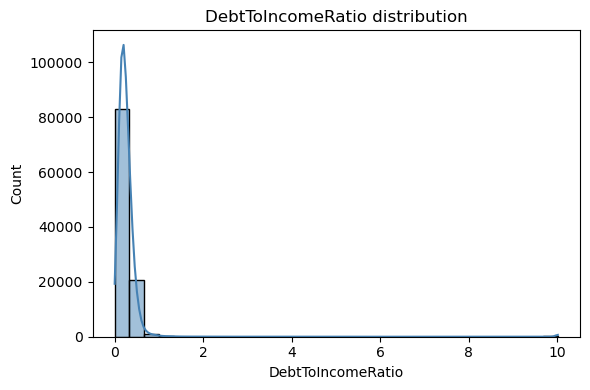

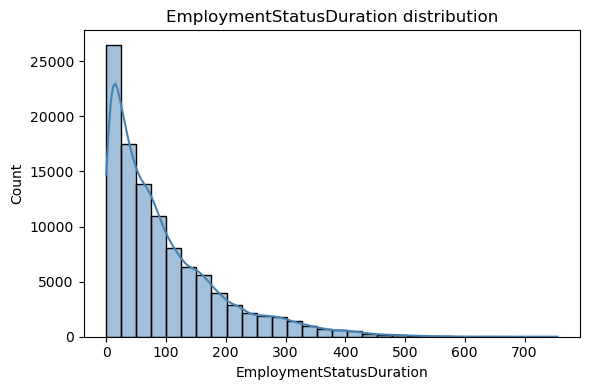

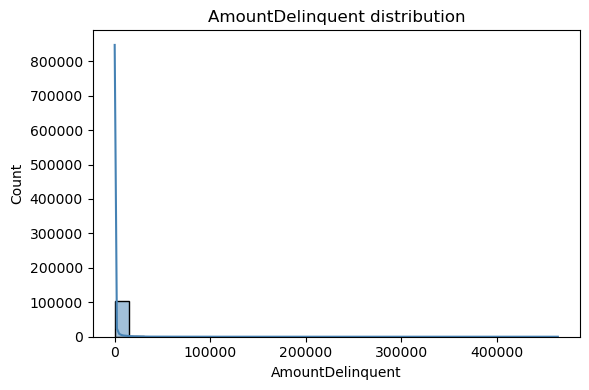

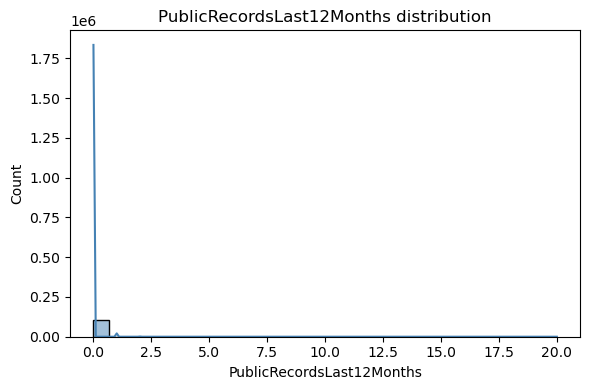

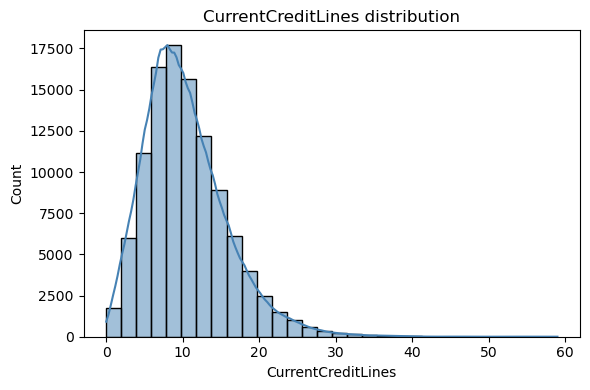

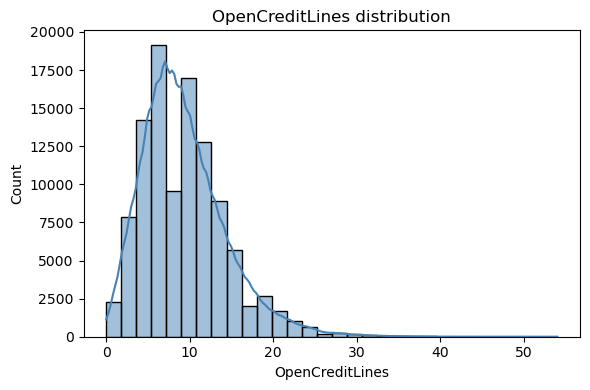

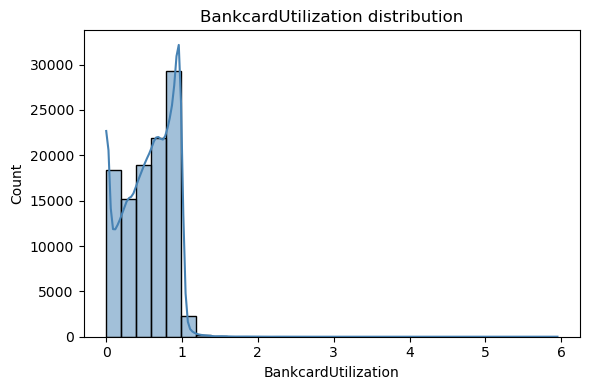

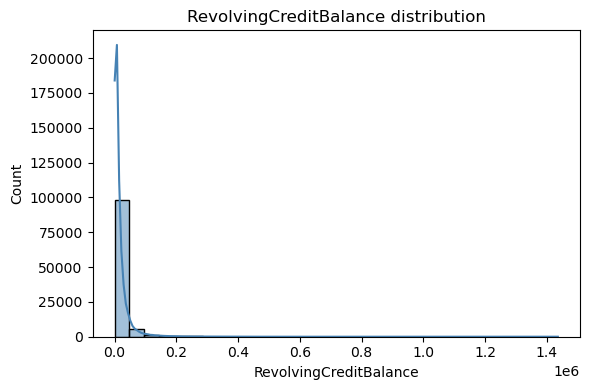

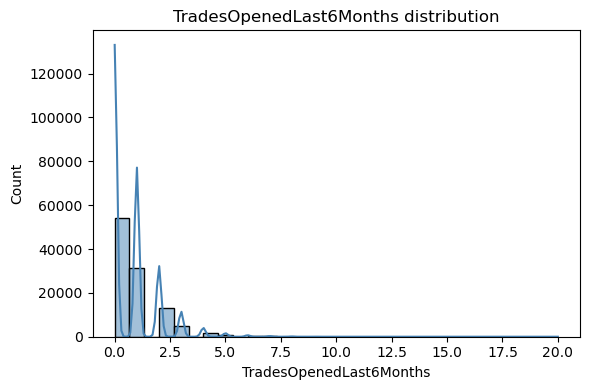

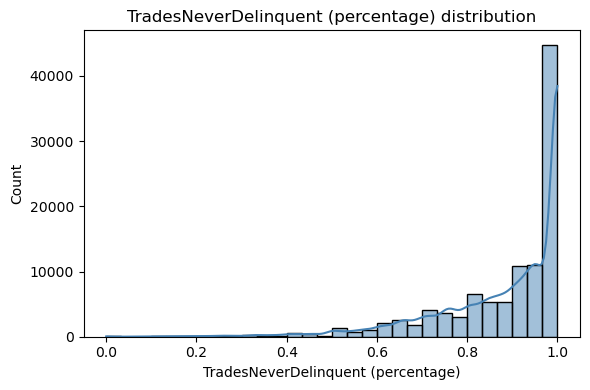

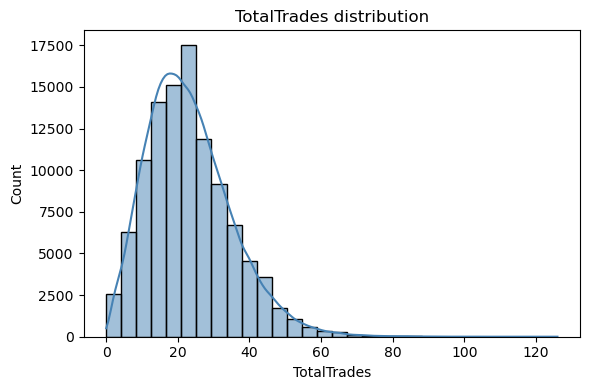

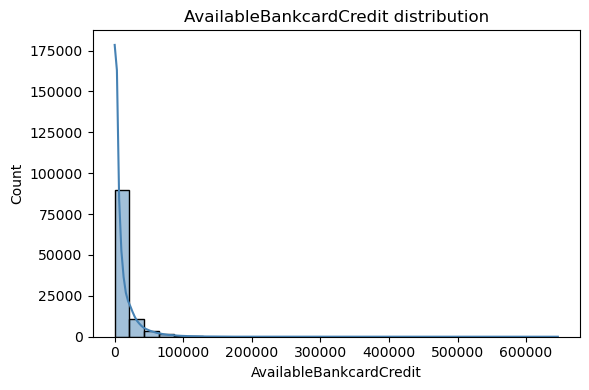

In [36]:
plot_quantitative_distributions(cleaned_df, category_col=None, bins=30)

In [37]:
columns_to_describe = [
    'DebtToIncomeRatio', 'EmploymentStatusDuration', 'AmountDelinquent',
    'PublicRecordsLast12Months', 'CurrentCreditLines', 'OpenCreditLines',
    'BankcardUtilization', 'RevolvingCreditBalance', 'TradesOpenedLast6Months',
    'TradesNeverDelinquent (percentage)', 'TotalTrades', 'AvailableBankcardCredit']

cleaned_df[columns_to_describe].describe()


,DebtToIncomeRatio,EmploymentStatusDuration,AmountDelinquent,PublicRecordsLast12Months,CurrentCreditLines,OpenCreditLines,BankcardUtilization,RevolvingCreditBalance,TradesOpenedLast6Months,TradesNeverDelinquent (percentage),TotalTrades,AvailableBankcardCredit
count,105383.000000,106312.000000,106315.000000,106333.000000,106333.000000,106333.000000,106333.000000,1.063330e+05,106393.000000,106393.000000,106393.000000,106393.000000
mean,0.275947,96.071582,984.507059,0.015094,10.317192,9.260164,0.561309,1.759871e+04,0.802327,0.885897,23.230034,11210.225447
std,0.551759,94.480605,7158.270157,0.154092,5.457866,5.022644,0.317918,3.293640e+04,1.097637,0.148179,11.871311,19818.361309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.140000,26.000000,0.000000,0.000000,7.000000,6.000000,0.310000,3.121000e+03,0.000000,0.820000,15.000000,880.000000
50%,0.220000,67.000000,0.000000,0.000000,10.000000,9.000000,0.600000,8.549000e+03,0.000000,0.940000,22.000000,4100.000000
75%,0.320000,137.000000,0.000000,0.000000,13.000000,12.000000,0.840000,1.952100e+04,1.000000,1.000000,30.000000,13180.000000
max,10.010000,755.000000,463881.000000,20.000000,59.000000,54.000000,5.950000,1.435667e+06,20.000000,1.000000,126.000000,646285.000000


##  Statistical Summary of Remaining Numeric Columns (≤ 6% Missing)

Before handling the remaining columns with moderate missingness (≤ 7%), we analyzed their distribution and key statistics (mean, median, std, min, max) to decide on the appropriate imputation strategy.

The table below summarizes important metrics for the following features:

- **DebtToIncomeRatio**
- **EmploymentStatusDuration**
- **AmountDelinquent**
- **PublicRecordsLast12Months**
- **CurrentCreditLines**
- **OpenCreditLines**
- **BankcardUtilization**
- **RevolvingCreditBalance**
- **TradesOpenedLast6Months**
- **TradesNeverDelinquent (percentage)**
- **TotalTrades**
- **AvailableBankcardCredit**

Most of these variables exhibit **right-skewed distributions**, making the **median** the most suitable choice for imputation, as it is more robust to outliers.

 **Next Step:** Impute missing values using the **median** for each of these columns.


In [38]:
columns_to_fill = [
    'DebtToIncomeRatio',
    'EmploymentStatusDuration',
    'AmountDelinquent',
    'CurrentCreditLines',
    'OpenCreditLines',
    'BankcardUtilization',
    'RevolvingCreditBalance',
    'TradesOpenedLast6Months',
    'TotalTrades',
    'AvailableBankcardCredit']


cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].median())


In [39]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
PublicRecordsLast12Months              6.673864
TradesNeverDelinquent (percentage)     6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus                       1.979164
TotalInquiries                         1.017229
DelinquenciesLast7Years                0.868901
FirstRecordedCreditLine                0.611742
TotalCreditLinespast7years             0.611742
InquiriesLast6Months                   0.611742
CurrentDelinquencies                   0.611742
PublicRecordsLast10Years               0.611742
CreditScoreRangeLower                  0.518708
CreditScoreRangeUpper                  0.518708
BorrowerAPR                            0.021942
dtype: float64


##  Imputation Step: Median-Filled Quantitative Features

Based on the previous statistical and visual analysis of skewness, we identified a group of **right-skewed** numerical columns where the **median** is the most appropriate imputation method. This helps minimize the influence of outliers.

###  Columns filled using `median()`:

- `DebtToIncomeRatio`
- `EmploymentStatusDuration`
- `AmountDelinquent`
- `CurrentCreditLines`
- `OpenCreditLines`
- `BankcardUtilization`
- `RevolvingCreditBalance`
- `TradesOpenedLast6Months`
- `TotalTrades`
- `AvailableBankcardCredit`

columns_to_fill = [
    'DebtToIncomeRatio', 'EmploymentStatusDuration', 'AmountDelinquent',
    'CurrentCreditLines', 'OpenCreditLines', 'BankcardUtilization',
    'RevolvingCreditBalance', 'TradesOpenedLast6Months', 'TotalTrades',
    'AvailableBankcardCredit'
]

cleaned_df[columns_to_fill] = cleaned_df[columns_to_fill].fillna(cleaned_df[columns_to_fill].median())


### Re-check:
As shown in the updated missing_data_summary, the missing values for these columns have been successfully imputed.

## Next Step:
Handle the remaining columns, including:

PublicRecordsLast12Months (dominantly 0 → will be filled with 0),

TradesNeverDelinquent (percentage) (highly left-skewed → will be filled with mean).

In [40]:
cleaned_df['PublicRecordsLast12Months'] = cleaned_df['PublicRecordsLast12Months'].fillna(0)
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                            51.649596
TradesNeverDelinquent (percentage)     6.621203
BorrowerState                          4.840394
Occupation                             3.149109
EmploymentStatus                       1.979164
TotalInquiries                         1.017229
DelinquenciesLast7Years                0.868901
FirstRecordedCreditLine                0.611742
TotalCreditLinespast7years             0.611742
InquiriesLast6Months                   0.611742
CurrentDelinquencies                   0.611742
PublicRecordsLast10Years               0.611742
CreditScoreRangeLower                  0.518708
CreditScoreRangeUpper                  0.518708
BorrowerAPR                            0.021942
dtype: float64


## 🧾 Handling Missing Values: `PublicRecordsLast12Months`

Upon examining the distribution and descriptive statistics of the `PublicRecordsLast12Months` column, we observed the following:

-  **Distribution**: Highly right-skewed with the majority of values concentrated at **0**.
-  **Median** = 0, **25%** = 0, **75%** = 0.
-  **Outliers**: Few extreme values (e.g., 20), but they are very rare.

###  Decision:
We chose to **fill missing values with `0`**, rather than using the mean or median. This decision is based on:
- The overwhelming presence of zeros (i.e., most users had **no public records** in the last 12 months).
- Avoiding artificial inflation of the data caused by outliers.


# Next Step:
Proceed to handle the remaining missing columns and finalize the cleaned dataset.


In [41]:
cleaned_df['TradesNeverDelinquent (percentage)'] = cleaned_df['TradesNeverDelinquent (percentage)'].fillna(
cleaned_df['TradesNeverDelinquent (percentage)'].mean())
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                    51.649596
BorrowerState                  4.840394
Occupation                     3.149109
EmploymentStatus               1.979164
TotalInquiries                 1.017229
DelinquenciesLast7Years        0.868901
FirstRecordedCreditLine        0.611742
TotalCreditLinespast7years     0.611742
InquiriesLast6Months           0.611742
CurrentDelinquencies           0.611742
PublicRecordsLast10Years       0.611742
CreditScoreRangeLower          0.518708
CreditScoreRangeUpper          0.518708
BorrowerAPR                    0.021942
dtype: float64


##  Imputation Step: `TradesNeverDelinquent (percentage)`

Upon examining the distribution of the `TradesNeverDelinquent (percentage)` column, we found it to be **highly left-skewed**, with most values concentrated near **1.0**.

This indicates that the vast majority of borrowers have never missed payments on trades — making the **mean** a reasonable and statistically sound choice for imputation.

### Code Used:

cleaned_df['TradesNeverDelinquent (percentage)'] = cleaned_df['TradesNeverDelinquent (percentage)'].fillna(
    cleaned_df['TradesNeverDelinquent (percentage)'].mean()
)

## Why Mean?
Left-skewed with strong concentration near 1.0.

Mean reflects the central tendency for this positively biased distribution.

Preserves numerical precision and variation in modeling.

In [42]:
columns_to_describe = ['TotalInquiries','DelinquenciesLast7Years','TotalCreditLinespast7years','InquiriesLast6Months','CurrentDelinquencies','PublicRecordsLast10Years','CreditScoreRangeLower','CreditScoreRangeUpper','BorrowerAPR']

cleaned_df[columns_to_describe].describe()

,TotalInquiries,DelinquenciesLast7Years,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,PublicRecordsLast10Years,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR
count,112778.000000,112947.000000,113240.000000,113240.000000,113240.000000,113240.000000,113346.000000,113346.000000,113912.000000
mean,5.584405,4.154984,26.754539,1.435085,0.592052,0.312646,685.567731,704.567731,0.218828
std,6.429946,10.160216,13.637871,2.437507,1.978707,0.727868,66.458275,66.458275,0.080364
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.006530
25%,2.000000,0.000000,17.000000,0.000000,0.000000,0.000000,660.000000,679.000000,0.156290
50%,4.000000,0.000000,25.000000,1.000000,0.000000,0.000000,680.000000,699.000000,0.209760
75%,7.000000,3.000000,35.000000,2.000000,0.000000,0.000000,720.000000,739.000000,0.283810
max,379.000000,99.000000,136.000000,105.000000,83.000000,38.000000,880.000000,899.000000,0.512290


In [43]:
columns_median = [
    'TotalInquiries', 'DelinquenciesLast7Years',
    'TotalCreditLinespast7years', 'InquiriesLast6Months',
    'CurrentDelinquencies', 'PublicRecordsLast10Years',
    'BorrowerAPR'
]

columns_mean = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']


cleaned_df[columns_median] = cleaned_df[columns_median].fillna(cleaned_df[columns_median].median())


cleaned_df[columns_mean] = cleaned_df[columns_mean].fillna(cleaned_df[columns_mean].mean())


In [44]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                 51.649596
BorrowerState               4.840394
Occupation                  3.149109
EmploymentStatus            1.979164
FirstRecordedCreditLine     0.611742
dtype: float64


## ✅Final Imputation Summary for Float Columns

In this step, we completed the imputation for the remaining `float64` columns using appropriate strategies based on distribution shapes and statistical summaries:

---

###  Applied Strategies:

| Column Type     | Strategy Used | Columns                                                                 |
|-----------------|----------------|-------------------------------------------------------------------------|
| Right-skewed    | **Median**     | `TotalInquiries`, `DelinquenciesLast7Years`, `TotalCreditLinespast7years`, `InquiriesLast6Months`, `CurrentDelinquencies`, `PublicRecordsLast10Years`, `BorrowerAPR` |
| Near-Normal     | **Mean**       | `CreditScoreRangeLower`, `CreditScoreRangeUpper`                       |

All missing values in these columns have been successfully imputed. The dataset is now more robust and ready for further analysis or modeling.

---

###  Next Step:
We will now examine the **object-type (categorical)** columns, analyze their value distributions, and determine the most suitable imputation methods (e.g., mode or probabilistic sampling).



In [45]:
cleaned_df.describe(exclude='number')

,ListingKey,ListingCreationDate,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey,IsClosed
count,113937,113937,113937,55089,113937,108422,110349,111682,113937,113937,113937,113240,113937,113937,113937,113937,113937,113937,113937
unique,113066,113064,12,2802,7,51,67,8,2,2,112992,11585,8,2,113066,1873,33,90831,2
top,17A93590655669644DB4C06,2013-10-02 17:20:16.550000000,Current,2014-03-04 00:00:00,C,CA,Other,Employed,True,False,2013-12-23 09:38:12,1993-12-01 00:00:00,"$25,000-49,999",True,CB1B37030986463208432A1,2014-01-22 00:00:00,Q4 2013,63CA34120866140639431C9,False
freq,6,6,56576,105,24447,14717,28617,67322,57478,101218,6,185,32192,105268,6,491,14450,9,58848


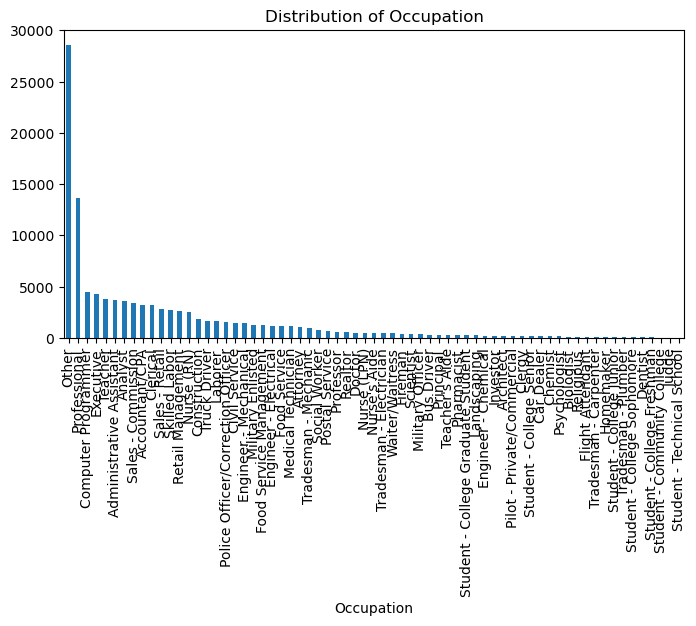

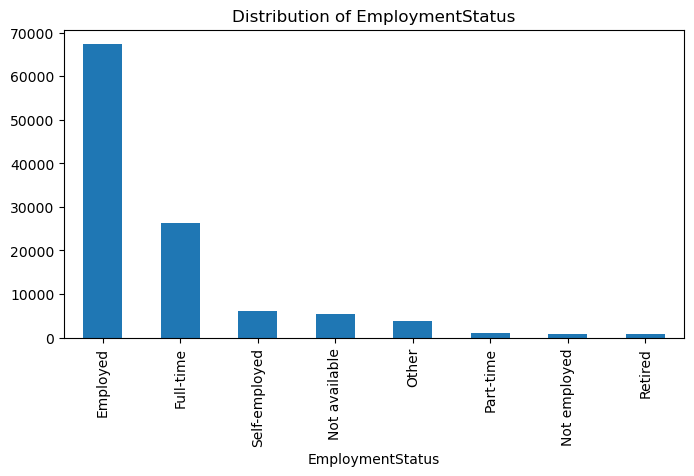

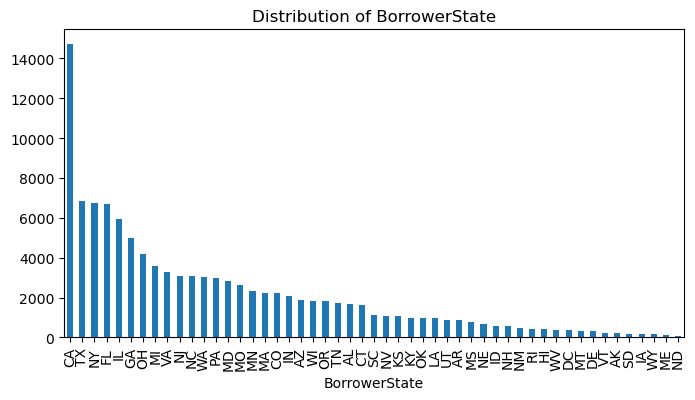

In [46]:
value_counts_plot(cleaned_df,'Occupation')
value_counts_plot(cleaned_df,'EmploymentStatus')
value_counts_plot(cleaned_df,'BorrowerState')

In [47]:
def fill_categorical_missing_by_distribution(df, column):
    dist = df[column].value_counts(normalize=True)
    n_missing = df[column].isnull().sum()
    fill_values = np.random.choice(dist.index, size=n_missing, p=dist.values)
    df.loc[df[column].isnull(), column] = fill_values
    return df


cleaned_df = fill_categorical_missing_by_distribution(cleaned_df, 'Occupation')
cleaned_df = fill_categorical_missing_by_distribution(cleaned_df, 'EmploymentStatus')
cleaned_df = fill_categorical_missing_by_distribution(cleaned_df, 'BorrowerState')

In [48]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate                 51.649596
FirstRecordedCreditLine     0.611742
dtype: float64


##  Handling Missing Values in Categorical Columns

###  Objective:
To impute missing values in categorical columns using their actual value distribution (probabilistic sampling), instead of just filling with the mode. This helps preserve the original distribution and diversity of the dataset.

---

### Categorical Columns with Missing Values:
- `Occupation`:  **3588** missing values
- `EmploymentStatus`:  **2255** missing values
- `BorrowerState`:  **5515** missing values

---

### Exploratory Steps:

1. **Visualized category distributions** using `value_counts_plot()` for:
   - `Occupation`
   - `EmploymentStatus`
   - `BorrowerState`

   These bar plots were used to ensure that each column had a realistic, non-uniform distribution — justifying the use of probabilistic filling.

2. **Checked the number of missing values** using `.isnull().sum()` to assess the scale of missing data.

---

###  Chosen Imputation Strategy:

def fill_categorical_missing_by_distribution(df, column):
    dist = df[column].value_counts(normalize=True)  # Get value distribution
    n_missing = df[column].isnull().sum()           # Count missing values
    fill_values = np.random.choice(dist.index, size=n_missing, p=dist.values)  # Generate random fills
    df.loc[df[column].isnull(), column] = fill_values
    return df


In [49]:

cleaned_df['FirstRecordedCreditLine'] = pd.to_datetime(cleaned_df['FirstRecordedCreditLine'], errors='coerce')


median_year = cleaned_df['FirstRecordedCreditLine'].dropna().dt.year.median()
fill_date = pd.to_datetime(f"{int(median_year)}-01-01")
cleaned_df['FirstRecordedCreditLine'] = cleaned_df['FirstRecordedCreditLine'].fillna(fill_date)


cleaned_df['FirstCreditYear'] = cleaned_df['FirstRecordedCreditLine'].dt.year


# Handling Missing Values in `FirstRecordedCreditLine`

The `FirstRecordedCreditLine` column contains the date when the borrower's credit history was first recorded. This is a valuable temporal feature, but the column had:
- Some invalid entries (e.g., text or non-date values)
- 697 missing values (`NaN`)

---

###  Cleaning Steps

## 1. **Converted to datetime format:**

cleaned_df['FirstRecordedCreditLine'] = pd.to_datetime(cleaned_df['FirstRecordedCreditLine'], errors='coerce')

This ensures that all valid date strings are converted to datetime objects.

Any invalid formats are coerced to NaT (missing).

## 2. Filled missing values using median year:
median_year = cleaned_df['FirstRecordedCreditLine'].dropna().dt.year.median()
fill_date = pd.to_datetime(f"{int(median_year)}-01-01")
cleaned_df['FirstRecordedCreditLine'] = cleaned_df['FirstRecordedCreditLine'].fillna(fill_date)

This replaces missing values with a standard date (e.g., 2001-01-01) based on the median year across all valid entries.
Median is preferred here over mean to reduce the influence of outliers (e.g., very old or very recent credit records).



## 3. Extracted the year as a new numeric feature:
cleaned_df['FirstCreditYear'] = cleaned_df['FirstRecordedCreditLine'].dt.year

This transforms the date into a usable numerical feature (int) which is easier  for example to include in machine learning models or visual analysis.

In [50]:
missing_data_summary(cleaned_df)

Missing Values (%):
ClosedDate    51.649596
dtype: float64


# Zero missing values 

In [51]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  object        
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   ClosedDate                          55089 non-null   object        
 6   BorrowerAPR                         113937 non-null  float64       
 7   BorrowerRate                        113937 non-null  float64       
 8   LenderYield                         113937 non-null  float64       
 9   EstimatedEffectiveYield             113937 non-null  float64       
 10  Estimate

## all values are filled 

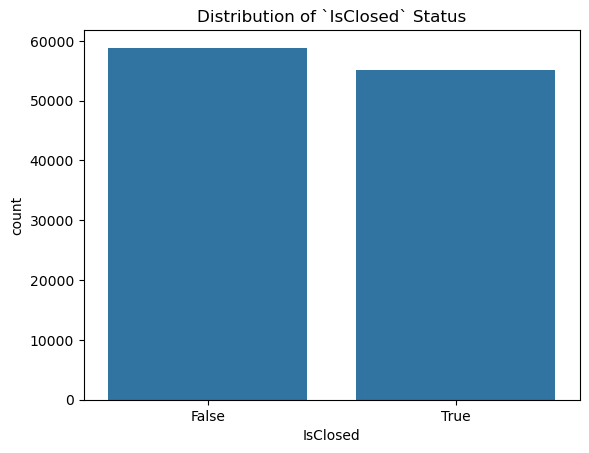

In [52]:
sns.countplot(cleaned_df,x='IsClosed')

plt.title('Distribution of `IsClosed` Status');

#. Distribution of `IsClosed` Status

To explore the distribution of business closure status, we used a count plot.

sns.countplot(cleaned_df, x='IsClosed')


## The chart displays how many businesses are marked as closed (True) versus still open (False).
This helps in understanding the general trend in the dataset — whether most businesses remain active or have been closed.

From the chart, we observe a nearly even distribution between open and closed businesses, which gives a balanced view of the dataset's closure status.

In [66]:
def plot_filtered_correlation_heatmap(df, threshold=0.7, figsize=(14, 10), cmap='coolwarm'):

    numeric_df = df.select_dtypes(include='number')
    corr = numeric_df.corr()


    mask_thresh = (corr.abs() >= threshold) & (corr != 1.0)
    filtered_corr = corr.where(mask_thresh)

    mask_triangle = np.triu(np.ones_like(filtered_corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(filtered_corr, annot=False, mask=mask_triangle, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title(f"Filtered Correlation Heatmap (|r| ≥ {threshold})")
    plt.show()


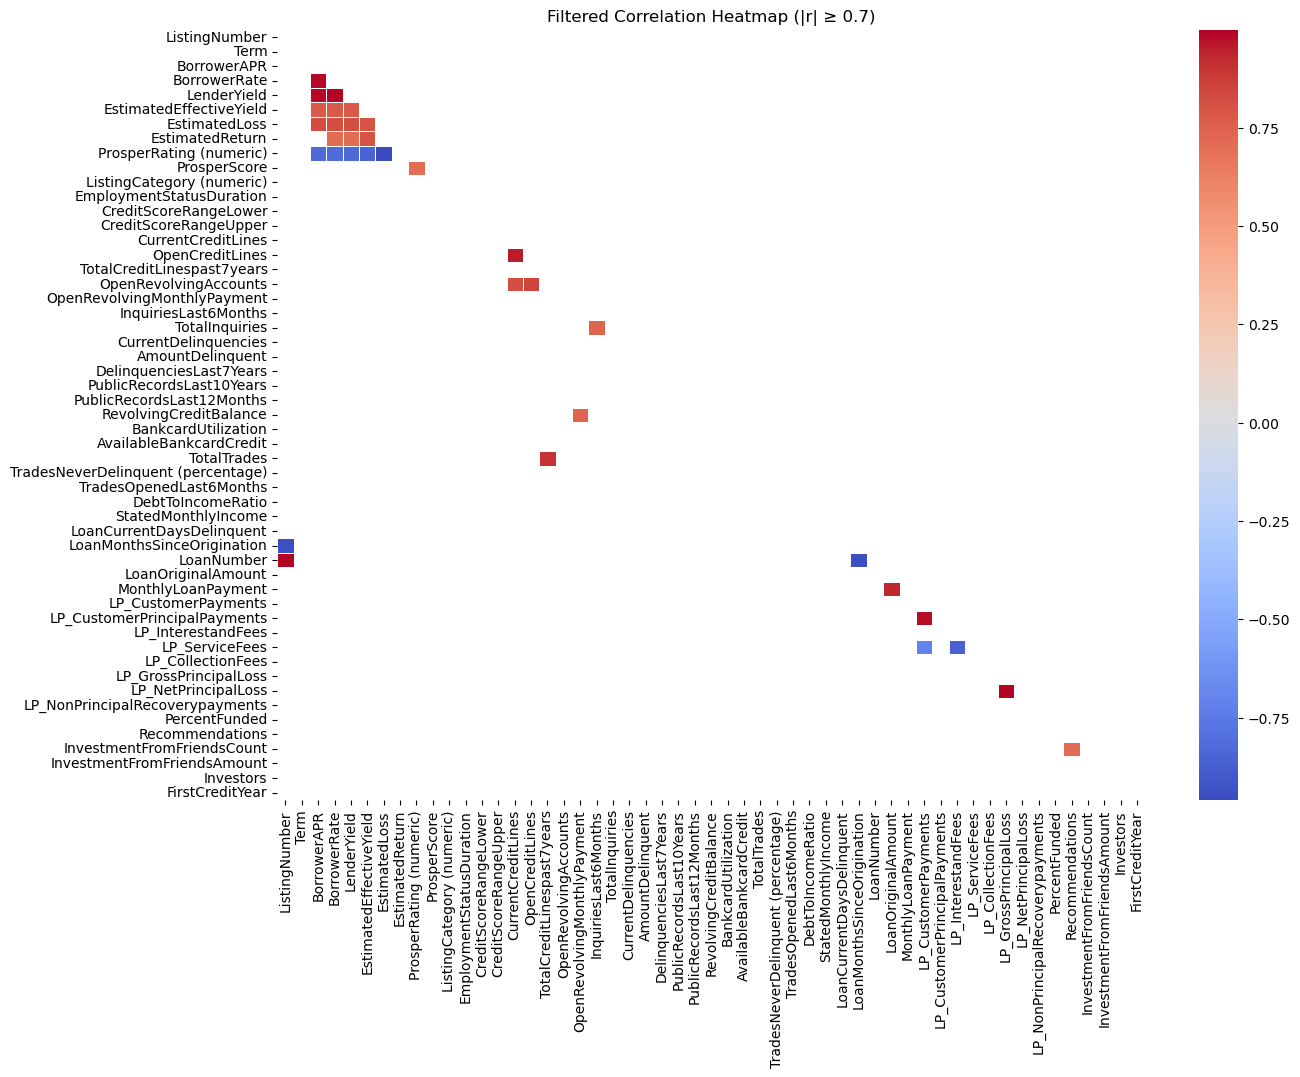

In [68]:
plot_filtered_correlation_heatmap(cleaned_df, threshold=0.7)

### 6. Filtered Correlation Heatmap (|r| ≥ 0.7)

To explore strong linear relationships between numeric variables, we generated a filtered correlation heatmap.

Instead of displaying all possible correlations (which can overwhelm the visualization), we focused on only those relationships with a Pearson correlation coefficient of **≥ 0.7 or ≤ -0.7**.

plot_filtered_correlation_heatmap(cleaned_df, threshold=0.7)


## This approach highlights meaningful associations while keeping the plot clean and readable.
It helps identify which numeric features move closely together — either in the same or opposite directions — and might reflect redundancy or strong co-dependence in the data.

In [73]:
def plot_scatter(df, x, y):
    """ Creates a scatter plot to analyze the relationship between two numeric variables. """
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{y} vs {x}')
    plt.show()

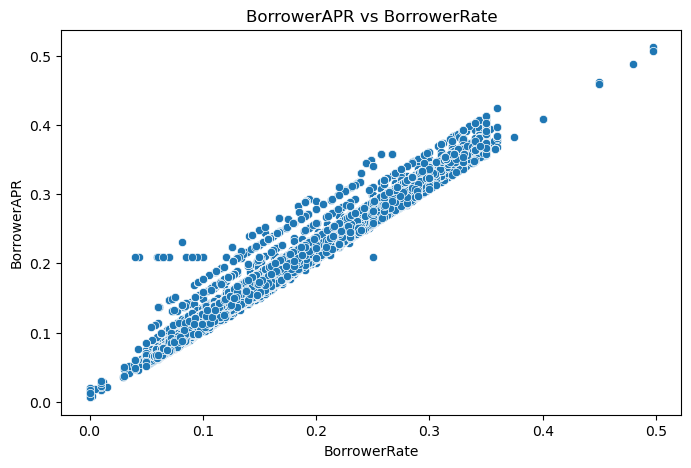

In [74]:
plot_scatter(cleaned_df,x='BorrowerRate',y='BorrowerAPR')

###  Relationship Between `BorrowerRate` and `BorrowerAPR`

To investigate how the nominal interest rate relates to the actual annual percentage rate, we plotted `BorrowerRate` against `BorrowerAPR`.

plot_scatter(cleaned_df, x='BorrowerRate', y='BorrowerAPR')

## The plot reveals a strong linear relationship, as expected.
Since BorrowerAPR includes additional fees and costs beyond the nominal rate (BorrowerRate), it tends to be slightly higher.
The tight clustering of points suggests consistency in how additional fees are applied across borrowers.

In [75]:
def boxplot_categorical_vs_numeric(df, cat_col, num_col):
    
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f"{num_col} by {cat_col}")
    plt.xticks(rotation=45)
    plt.show()


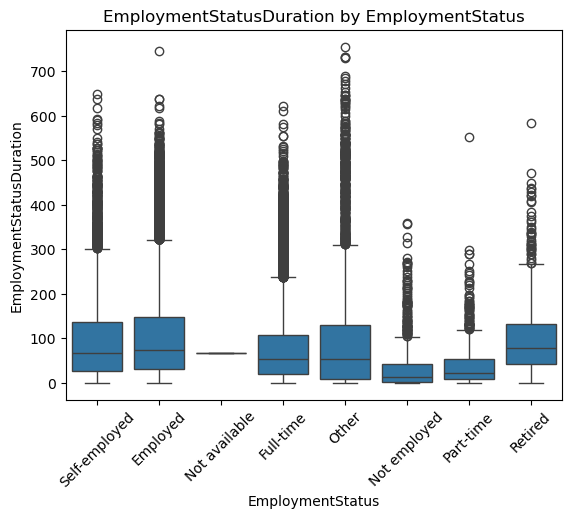

In [76]:
boxplot_categorical_vs_numeric(cleaned_df,'EmploymentStatus','EmploymentStatusDuration')

## Employment Duration by Employment Status

To explore how employment duration varies across different employment statuses, we used a boxplot:


boxplot_categorical_vs_numeric(cleaned_df, 'EmploymentStatus', 'EmploymentStatusDuration')


### The plot reveals:

Longer employment durations are observed among those who are *Employed* or *Self-employed*.

Not employed individuals have significantly lower employment durations, as expected.

Numerous outliers exist across all categories, indicating variation in employment history.

The boxplot helps compare medians and the spread of employment duration across groups in a compact, visual form.

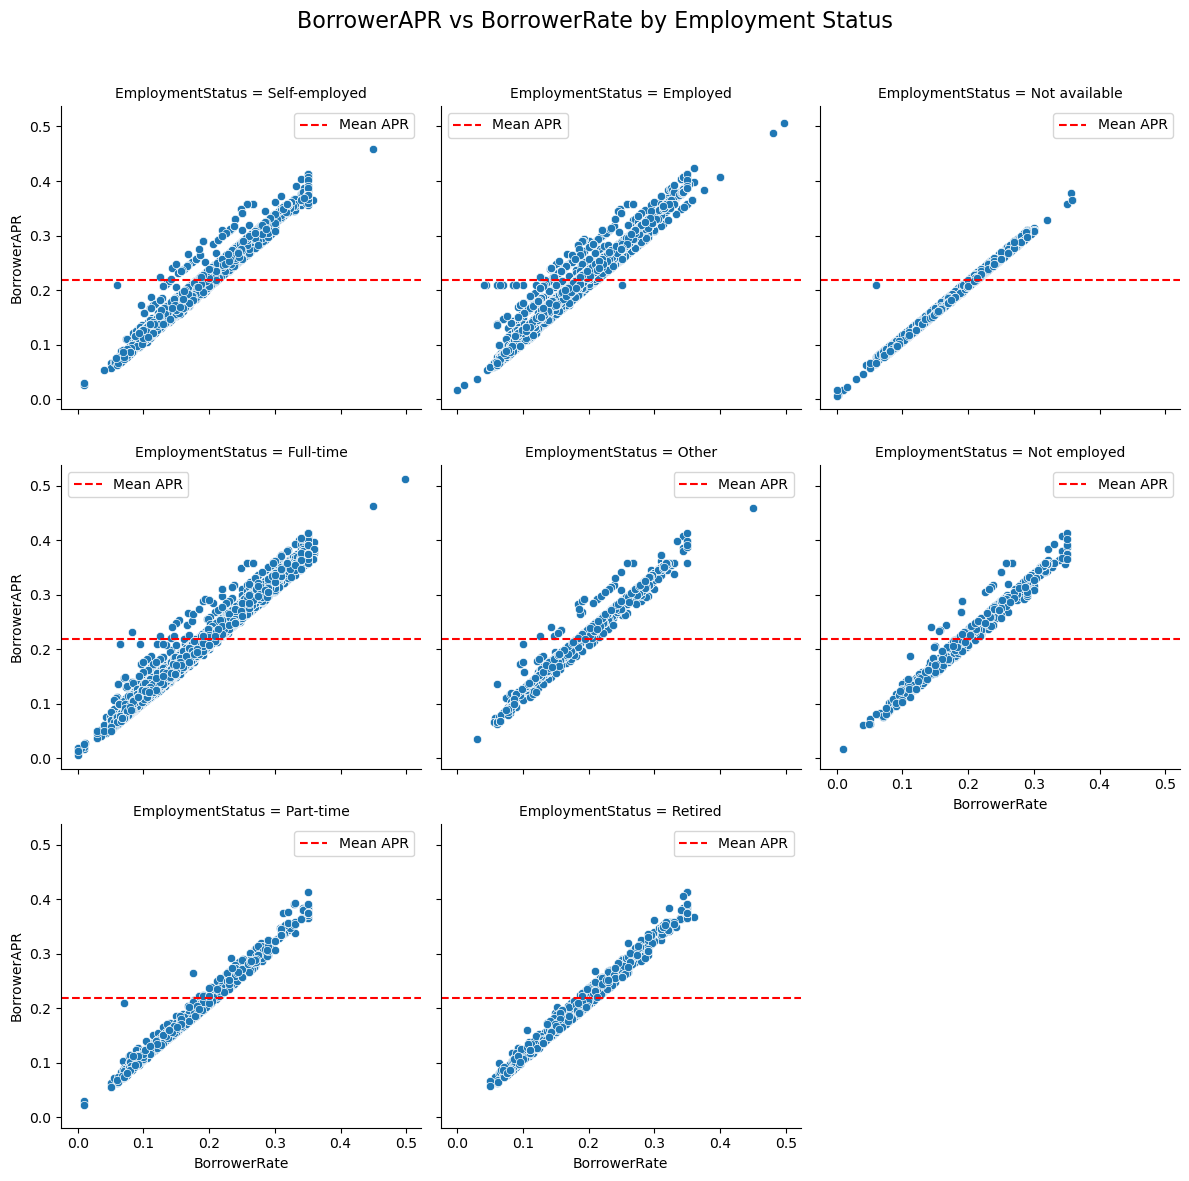

In [85]:
g = sns.relplot(
    data=cleaned_df,
    x='BorrowerRate',
    y='BorrowerAPR',
    col='EmploymentStatus',     
    col_wrap=3,                 
    kind='scatter',
    height=4,
    aspect=1
)

for ax in g.axes.flatten():
    mean_apr = cleaned_df['BorrowerAPR'].mean()
    ax.axhline(mean_apr, color='red', linestyle='--', label='Mean APR')
    ax.legend()

g.fig.suptitle('BorrowerAPR vs BorrowerRate by Employment Status', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  


# Faceted Scatter Plot: Exploring `BorrowerAPR` vs `BorrowerRate` by `EmploymentStatus`

To explore how the relationship between the nominal interest rate (`BorrowerRate`) and the actual annual percentage rate (`BorrowerAPR`) varies across different employment groups, we used a **Faceted Scatter Plot**.

sns.relplot(data=cleaned_df, x='BorrowerRate', y='BorrowerAPR', col='EmploymentStatus', kind='scatter', ...)


Each subplot represents a unique EmploymentStatus category (e.g., Employed, Self-employed, Retired, etc.), allowing us to visually compare patterns across groups without aggregating the data.

## Why this is useful:

It allows us to see if different employment statuses show different APR behaviors.

Some employment categories might have more variability, tighter clustering, or outliers that could impact interpretation or downstream analysis.

This is especially relevant in financial or credit risk modeling where employment type may influence interest rate offers.

## Enhancement added:

A red dashed horizontal line represents the mean BorrowerAPR across the entire dataset, giving a visual baseline for comparison across all subgroups.


## Observations:
Most groups show a strong linear relationship between BorrowerRate and BorrowerAPR, as expected.

Some employment statuses (e.g., "Self-employed", "Employed") have broader spread and more variation above and below the average APR.

Others (e.g., "Not available", "Retired") show tighter clustering near the mean, which could indicate more standardized or conservative lending behavior.

This type of faceted visualization provides granular insights into group-specific behaviors that may be hidden in aggregated plots.


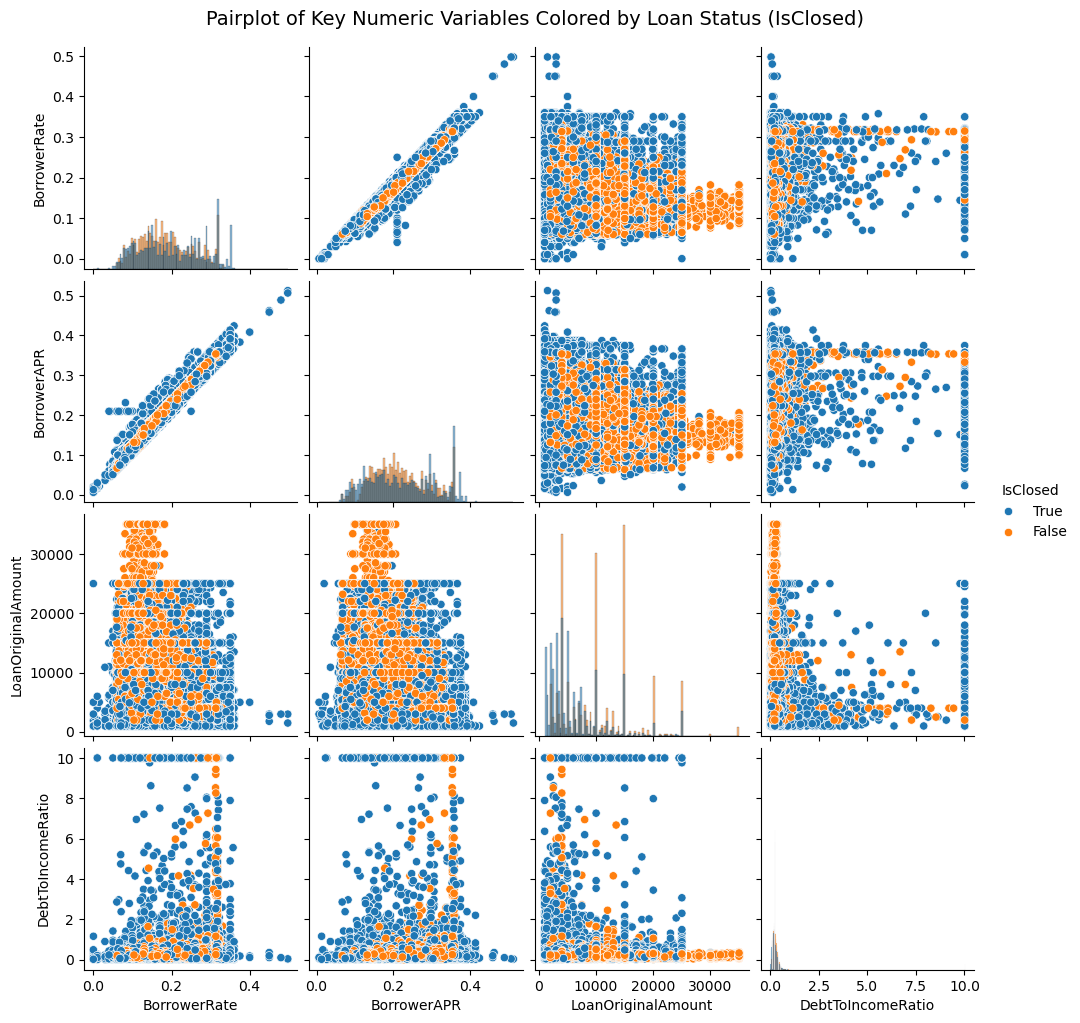

In [88]:
selected_columns = [
    'BorrowerRate',
    'BorrowerAPR',
    'LoanOriginalAmount', 
    'DebtToIncomeRatio',
    'IsClosed']

subset_df = cleaned_df[selected_columns].copy()
subset_df['IsClosed'] = subset_df['IsClosed'].astype(str)

sns.pairplot(data=subset_df, hue='IsClosed', diag_kind='hist', height=2.5)
plt.suptitle('Pairplot of Key Numeric Variables Colored by Loan Status (IsClosed)', fontsize=14, y=1.02)
plt.show()


# Pairplot of Key Financial Variables by Loan Status

To visualize pairwise relationships among key numeric variables and how they differ by loan closure status (`IsClosed`), we used a `pairplot`.

sns.pairplot(data=subset_df, hue='IsClosed', diag_kind='hist')


## What this shows:

Clear linear relationship between BorrowerRate and BorrowerAPR.

LoanOriginalAmount shows discrete groupings, possibly reflecting loan package types.

DebtToIncomeRatio is right-skewed, with a small number of borrowers having extremely high ratios.

The color separation by IsClosed reveals that both open and closed loans are present across all ranges, though some trends are noticeable in specific pairings.

This matrix plot provides an efficient multivariate overview for detecting trends and potential feature interactions.

#Q1: How does the relationship between BorrowerRate and BorrowerAPR vary by employment status?

There is a strong linear relationship between `BorrowerRate` and `BorrowerAPR` across all employment statuses. However, the spread and clustering of the values vary slightly by employment type. For example, "Self-employed" and "Employed" borrowers show more dispersion compared to "Retired" or "Not available", which are more tightly clustered.

---

# Q2: Are certain borrower characteristics (e.g., employment duration, debt-to-income ratio) associated with loan status (IsClosed)?

Yes. From the boxplot of `EmploymentStatusDuration` vs `EmploymentStatus`, we can see variation in employment tenure across different statuses. Also, using the pairplot colored by `IsClosed`, differences in `DebtToIncomeRatio` distributions between open and closed loans were observed.

---

# Q3: What is the correlation between key financial indicators (e.g., BorrowerRate, DebtToIncomeRatio, LoanOriginalAmount)?

The correlation heatmap revealed a strong positive correlation between `BorrowerRate` and `BorrowerAPR`. Most other variables showed weak to moderate correlations. This indicates limited redundancy and suggests that each feature adds unique information to the dataset.

---

# Q4: How do numeric variables differ across loan outcomes? Are there patterns indicating risk or default?

From the pairplot colored by `IsClosed`, we can observe subtle differences in variable distributions. For example, lower `LoanOriginalAmount` and higher `DebtToIncomeRatio` values seem more common in closed loans, which may reflect riskier borrower profiles.



# Conclusion

This exploratory data analysis of the Prosper Loan dataset provided valuable insights into financial patterns and borrower behaviors.

Key findings include:
- A consistent linear relationship between nominal and effective interest rates across employment statuses.
- Variability in borrower characteristics like employment duration and debt-to-income ratio in relation to loan outcomes.
- Low to moderate correlations among most financial variables, supporting the richness of the dataset.
- Potential risk indicators in loan closure status linked to debt ratios and loan amounts.

These insights lay the groundwork for deeper analysis, such as building predictive models for loan outcomes or risk scoring.



# Summary of Findings

- `BorrowerRate` and `BorrowerAPR` are tightly correlated, with some group-specific variability.
- Borrowers’ employment duration differs across employment categories.
- Heatmap revealed minimal multicollinearity except for a few strong pairings.
- Pairplot suggested certain borrower traits may be linked to loan closure status (`IsClosed`), hinting at potential risk factors.



# Reflection

The exploration process involved:
- Cleaning missing values and understanding data types.
- Performing univariate, bivariate, and multivariate analysis.
- Using advanced visualization techniques (e.g., faceted plots, pairplots).
- Annotating visualizations with summary lines and category distinctions.

This process improved my ability to explore large-scale financial data and interpret complex patterns. It also strengthened my skills in data visualization, hypothesis formulation, and exploratory storytelling using Python and Seaborn.
